In [1]:
%matplotlib widget

In [2]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from scipy import interpolate

In [3]:
dir = 'C:/Users/15972/OneDrive/桌面/FYP/Model/BERT_RF/Bert_RF_result.csv'

In [4]:
data = pd.read_csv(dir)

In [5]:
data

,subtrees,depth,kappa
0,10,10,0.754
1,10,50,0.791
2,10,100,0.791
3,10,300,0.799
4,20,10,0.756
5,20,50,0.798
6,20,100,0.796
7,20,300,0.797
8,50,10,0.756
9,50,50,0.803


In [6]:
def result_z (X,Y):
    Z = []
    for i in range(len(X)):
        z = []
        for j in range(len(X[0])):
            x = X[i][j]
            y = Y[i][j]
            k = data[(data["subtrees"] == y) & (data["depth"] == x)]
            k = k.loc[:,["kappa"]]
            k = k.to_numpy()
            z.append(k[0][0])
        Z.append(z)
    return Z

C:\Users\15972\AppData\Local\Temp\ipykernel_44320\4084757501.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax1 = Axes3D(fig1)


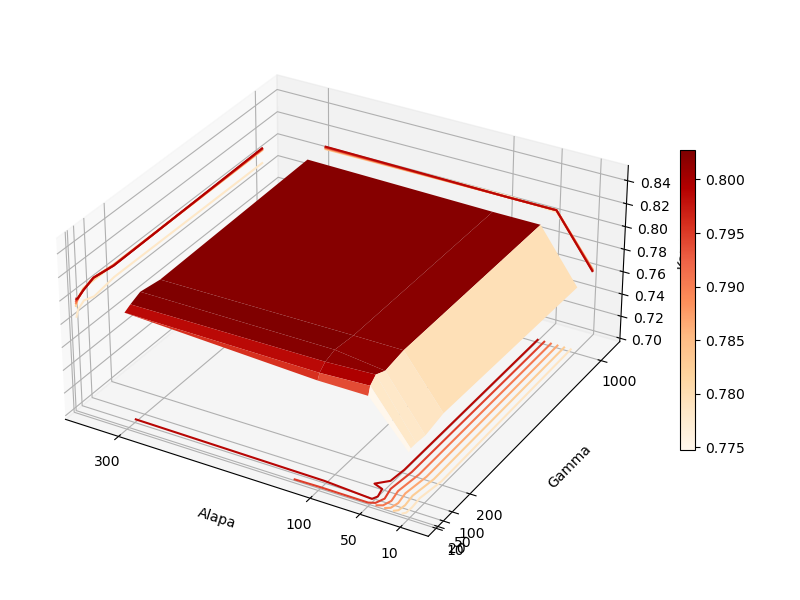

In [7]:
fig1 = plt.figure()
ax1 = Axes3D(fig1)
#Make data
X = np.array([10, 50, 100, 300])
Y = np.array([10, 20, 50, 100, 200, 1000])
X, Y = np.meshgrid(X, Y)
Z = np.array(result_z(X, Y))

cs = ax1.plot_surface(X, Y, Z, rcount=200, ccount=200, cmap=cm.OrRd)
ax1.set_yticks([10, 20, 50, 100, 200, 1000])
ax1.set_xticks([10, 50, 100, 300])
ax1.set_xlim(350, -10)
ax1.set_ylim(-10, 1100)
ax1.set_zlim(0.7, 0.85)
ax1.set_xlabel('Alapa')
ax1.set_ylabel('Gamma')
ax1.set_zlabel('Kappa')
ax1.contour(X,Y,Z,zdir='z',offset=0.7, cmap=cm.OrRd)

# Label every other level using strings

ax1.contour(X,Y,Z,zdir='x',offset=350, cmap=cm.OrRd)
ax1.contour(X,Y,Z,zdir='y',offset=1100, cmap=cm.OrRd)

fig1.colorbar(cs, shrink = 0.5)
fig1.gca().set_box_aspect((2, 2, 1))
fig1.set_size_inches(8, 6)
plt.show()